In [1]:
# Importing needed libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam



In [2]:
# connecting to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Loading data
data_dir = '/content/drive/MyDrive/NTI project/garbage-dataset'
test_dir = '/content/drive/MyDrive/NTI project/test_ds'

In [4]:
# Splitting data
train_ds = tf.keras.preprocessing.image_dataset_from_directory (
    data_dir,
    subset = 'training',
    batch_size = 32,
    image_size = (180,180), # it was set first to (224,224) but to safe memory to tran the model, we reduced it
    shuffle = True,
    seed = 123,
    validation_split = 0.35, # it was set first to 0.2, but we increased it for the same reason as above
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory (
    data_dir,
    subset = 'validation',
    batch_size = 32,
    image_size = (180,180),
    shuffle = False,
    seed = 123,
    validation_split = 0.35
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory (
    test_dir,
    batch_size = 32,
    image_size = (180,180),
    shuffle = False,
    seed = 123,
)

Found 18237 files belonging to 10 classes.
Using 11855 files for training.
Found 18237 files belonging to 10 classes.
Using 6382 files for validation.
Found 1525 files belonging to 10 classes.


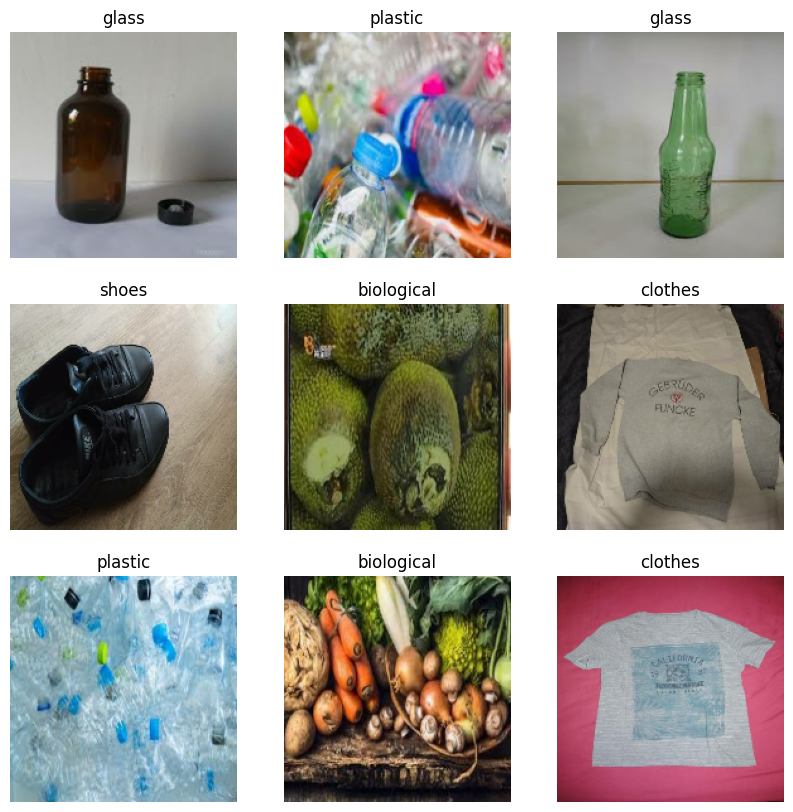

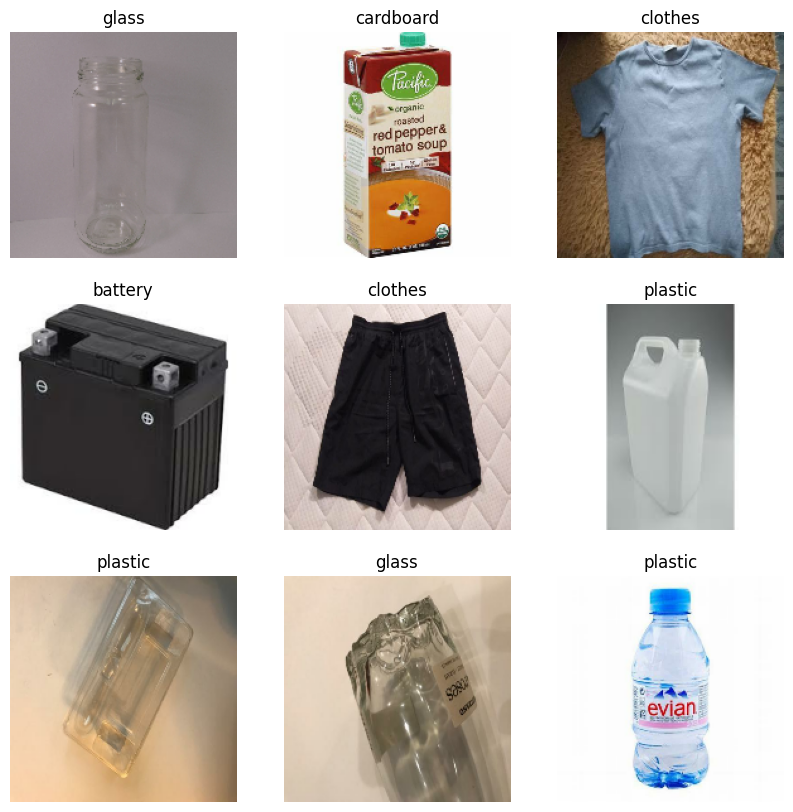

In [5]:
#visualising data
class_names = train_ds.class_names
for images, labels in train_ds.take(2):
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Show 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [6]:
# preprocessing

#normalization
normalization = tf.keras.layers.Rescaling(1.0/255)

train_ds = train_ds.map(lambda x, y: (normalization(x),y))
val_ds = val_ds.map(lambda x,y:(normalization(x),y))
test_ds = test_ds.map(lambda x,y:(normalization(x),y))

#augmentaion

augmentation = tf.keras.Sequential([
    # layers.RandomBrightness(0.1), # this augmentation is commented also to save memory
    layers.RandomContrast(0.1),
    layers.RandomFlip('Horizental'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2)
])

train_ds = train_ds.map(lambda x,y: (augmentation(x, training=True),y))

train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.prefetch(tf.data.AUTOTUNE)

In [7]:
# Model construction and training

model = tf.keras.Sequential ([
    # first convlution layer
    layers.Conv2D(32, kernel_size=3, activation='relu'),
    layers.AveragePooling2D(pool_size=2, strides=1),

    #second convolution layer
    layers.Conv2D(32, kernel_size=3, activation='relu'),
    layers.AveragePooling2D(pool_size=2, strides=1),

    #third convlutional layer
    # layers.Conv2D(64, kernel_size=3, activation='relu'),
    # layers.AveragePooling2D(pool_size=2, strides=1),

    #flattening the features
    layers.Flatten(),

    #fully connected layers
    layers.Dense(512, activation='relu'),
    # layers.Dense(512, activation='relu'),
    # layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

In [8]:
# model compilation and training
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_ds, validation_data=val_ds, epochs=5)


Epoch 1/5
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.3265 - loss: 7.7209

InvalidArgumentError: Graph execution error:

Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
2 root error(s) found.
  (0) INVALID_ARGUMENT:  Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]]
	 [[IteratorGetNext/_2]]
  (1) INVALID_ARGUMENT:  Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]]
0 successful operations.
0 derived errors ignored. [Op:__inference_multi_step_on_iterator_8873]